<a href="https://colab.research.google.com/github/anmgomezmo/Advance_machine_learning_for_physics/blob/main/Hands_on/Hands_on_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First HandsOn!

In this HandsOn we will recap the basics of pyTorch with a simple classification task

Slide for the day with the Task Description ([SLIDE](https://docs.google.com/presentation/d/1k5Ad5V_8sgvdTDyRzwxOhGObPCrzT_oXOlaZ8PjMGes/edit?usp=sharing))

Jamboard for the day ([BOARD](https://jamboard.google.com/d/1ZCghO9LeJA2i7GUiNgP-pe2u4M9mCAIU3p2_Le4W510/edit?usp=sharing))

At the end of the lesson, I will put them as a pdf on the github

# Connect your drive!

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# Go to the RiNNgs folder!

Use the command "cd" to change directory:

```
cd "directory"
```

then use "ls" (list) to show the files in the folder

## Are you in the correct directory ?

In [2]:
cd /content/gdrive/MyDrive/RiNNgs/

/content/gdrive/MyDrive/RiNNgs


# What's in the directory you are in ?

In [3]:
ls

data/  results/


In [4]:
# We need to get some files from github

import os
success = os.path.exists("./data_preprocess.py")

if not success:
  ! wget https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data_preprocess.py

--2024-03-10 17:07:55--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data_preprocess.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14603 (14K) [text/plain]
Saving to: ‘data_preprocess.py’

data_preprocess.py  100%[===================>]  14.26K  --.-KB/s    in 0.004s  

2024-03-10 17:07:55 (3.39 MB/s) - ‘data_preprocess.py’ saved [14603/14603]



In [5]:
ls

data/  data_preprocess.py  results/


# Lets create all the folders needed

In [6]:
import os

def CreateDir(path):
  # Create a directory if it does not exist
  success = os.path.exists(path)
  if not success:
    os.makedirs(path)

CreateDir("results")
CreateDir("results/display")
CreateDir("results/preprocess")
CreateDir("data")

In [9]:
success = os.path.exists("data/event_08011.file")

if not success:
  ! wget  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/event_08011.file -P data/
  ! wget -P data/ https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/RICH_map_corr_2017.data
  ! wget -P data/ https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/data_08011.json

--2024-03-10 17:11:07--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/event_08011.file
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375770 (367K) [application/octet-stream]
Saving to: ‘data/event_08011.file’

event_08011.file    100%[===================>] 366.96K  --.-KB/s    in 0.01s   

2024-03-10 17:11:07 (24.3 MB/s) - ‘data/event_08011.file’ saved [375770/375770]

--2024-03-10 17:11:07--  https://raw.githubusercontent.com/stefanogiagu/corso_AML_2023/main/notebooks/es1/data/RICH_map_corr_2017.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conn

# We need to build the dataset

How can we call a python code from a notebook script ?

Use the command:

```
! python script.py ARG1, ARG2, ..., ARGN
```

to call the "data_preprocess.py" that will find the run 0811 and form 16x16 images from it.

Arguments are "08011 Conv 16 np_reco 0"

**Ignore all the warnings and the tensorflow calls. This function is doing a lot more than what we need.**

In [10]:
! python data_preprocess.py 08011 Conv 16 np_reco 0

2024-03-10 17:19:10.986425: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 17:19:10.986503: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 17:19:10.988045: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-10 17:19:10.996617: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 17:19:12.392396: W tensorflow/compiler/tf2

# Where are our files ?

The script will write two files in the "results/preprocess" folder that we created before.

Check if you can find the files and that *x_all_** is the rigth size (around 40 Mb)

Use the command:

```
ls -lh "path"
```

In [11]:
ls -lh results/preprocess/

total 40M
-rw------- 1 root root  82K Mar 10 17:19 prova16.pdf
-rw------- 1 root root  40M Mar 10 17:19 x_all_08011.npy
-rw------- 1 root root 313K Mar 10 17:19 y_all_08011.npy


# Read the data, check the data format, print an element

*   Load the data with np.load
*   Print the data shape
*   Check the variable type
*   Use plt.matshow() to print an element

In [12]:
import numpy as np

dataset = "08011"
x_all = np.load('results/preprocess/' + 'x_all_{}.npy'.format(dataset))
y_all = np.load('results/preprocess/' + 'y_all_{}.npy'.format(dataset))

In [15]:
# Print info about the dataset
print(x_all.shape)
type(x_all[0,0,0])

(20000, 16, 16)


numpy.float64

[0. 1. 2.]


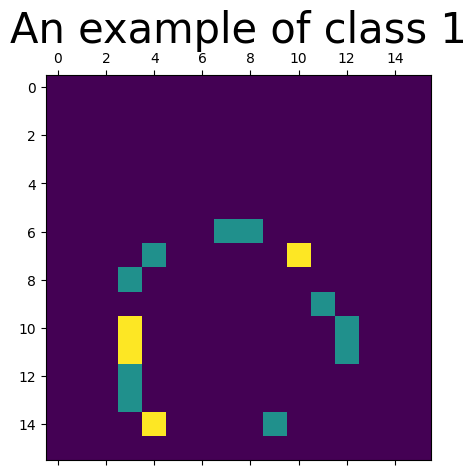

In [16]:
import matplotlib.pyplot as plt

to_plot = 10
def plot_example(image,lab):
  f,ax = plt.subplots(1,1,figsize=(5,5))
  ax.matshow(image)
  ax.set_title("An example of class {}".format(np.argmax(lab)), fontsize=30)
  print(np.unique(image))
plot_example(x_all[to_plot,:,:], y_all[to_plot])

# Plot a histogram of the average intensity per class

## A trick:

When you do this kind of data visualization, you are creating a lot of variables. If you wrap your code in a function you will keep the workspace clean.

This should be [N,1] :  (20000,)


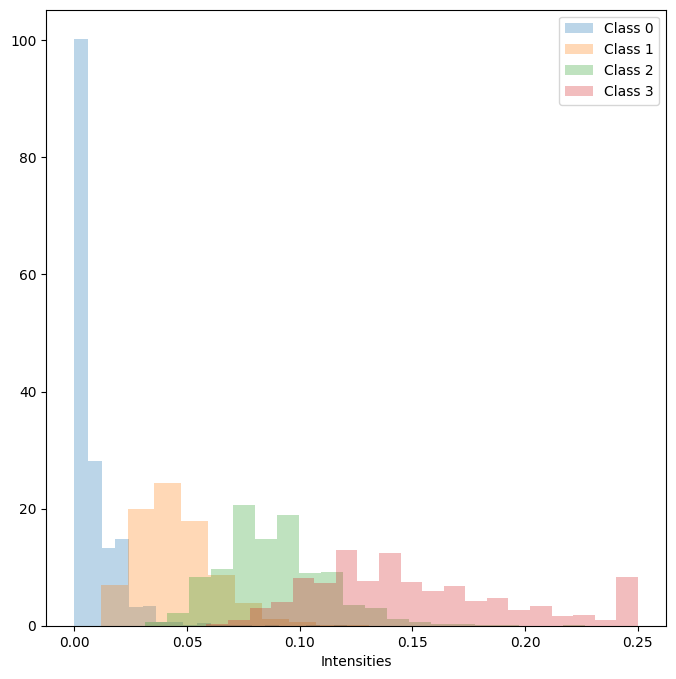

In [17]:
def plot_histo(x_all, y_all):

  classes = np.argmax(y_all, axis=1)

  intensities = x_all.reshape(x_all.shape[0], -1).mean(axis=1) # [N of elements, 16*16] taking the average over the 2nd dim (axis=1)
  print("This should be [N,1] : ", intensities.shape)

  f,ax = plt.subplots(1,1,figsize=(8,8))
  for c in [0,1,2,3]:
    ax.hist(intensities[classes==c], 20, alpha=0.3, label="Class {}".format(c), density=True)

  ax.set_xlabel("Intensities")
  ax.legend()

plot_histo(x_all,y_all)

This should be [N,1] :  (18402,)


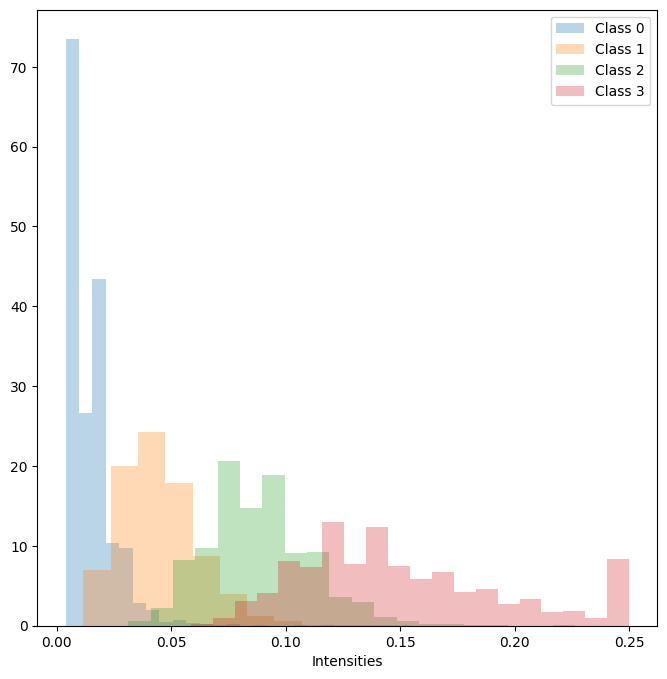

In [18]:
# Remove the empty images
def remove_empty(x_all,y_all):
  intensities = x_all.reshape(x_all.shape[0],-1).sum(axis=1)
  y_all = y_all[intensities > 0]
  x_all = x_all[intensities > 0]
  return x_all, y_all

x_all, y_all = remove_empty(x_all, y_all)
plot_histo(x_all, y_all)

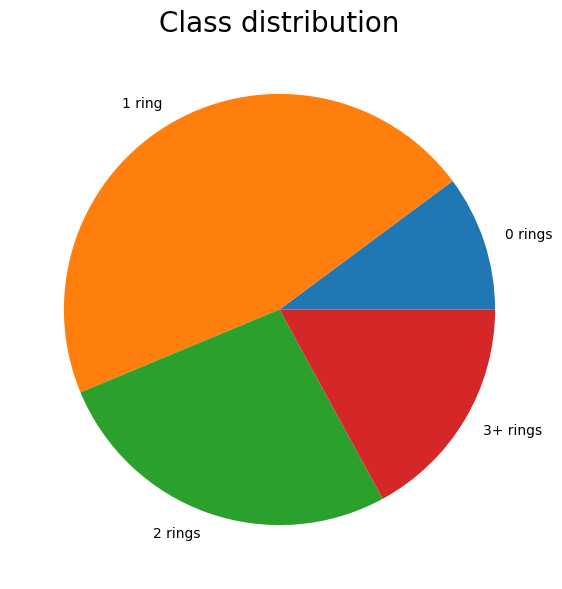

In [19]:
def piechartclasses(y_all):
  classes = np.argmax(y_all, axis=1)
  c = np.unique(classes)
  arr_c = [np.mean(classes==i) for i in c]

  # Creating plot
  fig = plt.figure(figsize=(10,7))
  plt.pie(arr_c, labels=["0 rings", "1 ring", "2 rings", "3+ rings"])

  # Show plot
  plt.title("Class distribution", fontsize=20)
  plt.show()

piechartclasses(y_all)

In [20]:
class Parent(): # This is a class

  def __init__(self):
    self.name = None
    self.introduction = "Hi,son . "

  def give_name(self,name): # This is a method of Parent class
    self.name = name

  def speak(self):
    if self.name is not None:
      print(self.introduction + "I am {}".format(self.name))
    else:
      print("give name first")

class Child(Parent): # This is a child class. It has the same methods of Parent

  def __init__(self): # Init is replaced. Everything is the same
    self.name = None
    self.introduction = "Hi,Mama . "

In [21]:
mama = Parent() # Create a instance of class Parent
mama.give_name("Marta") # Use a method (give name is a "function" inside the class)
son = Child() # Create a instance of class Child
son.give_name("Andrea") # We can use methods from the parent class

mama.speak() # He can speak!
son.speak() # He also can speak!

Hi,son . I am Marta
Hi,Mama . I am Andrea
